# Application to MNIST data

## New Technologies

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)
es una base de datos (de imagenes) extendida del NIST. La original NIST es recolectada (digitos a mano) de los oficinas postales em "M" es de high schools.

[Yann Lecun](http://yann.lecun.com/exdb/mnist/) mantiene este repositorio.

Recomiento el video
[What backpropagation is really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U).





In [1]:
# ejemplo de como partir los datos en 2
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# cargamos el MNIST
X,y = fetch_openml("mnist_784", version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3
)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# control de calidad
print(len(X_train), len(X_test))

49000 21000


In [3]:
print(len(X_test)/len(X))

0.3


# Bias Versus Variance.

Definimos inicialmente ambos conceptos.


## Bias:
Es el error general que ocurre cuando no hay un buen ajuste  a los datos.
En terminos estadisticos el bias es la diferencia entre el promedio de las predicciones y las etiquetas.

## Variance:
Es el error que ocurre cuando tratamos de ajustar muy bien el modelo. Esto produce un fenomeno que se llama "overfitting" (sobreajuste). En terminos estadisticos esto nos informa sobre la variabilidad (variacion) del model. En lenguaje ordinario (que tanto se "riega").


Vamos a estudiar la "pelea" entre estos dos conceptos.

Para esto comenzamos con la funcion objetivo.


$$ J(\theta) = \frac{1}{2m}  \left [  \sum_{i=1}^m ( h( \theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^n \theta_i^2  \right ].$$


El primer termino dentro de los corchetes es el MSE (Mean Squar Error)
[MSE](https://en.wikipedia.org/wiki/Mean_squared_error).

Consideremos un modelo hipotetico con datos $x_1, x_2, \cdots, x_m$,
y etiquetas $y_1, y_2, \cdots, y_m$.
Que el modelo se describe por la funcion $f$.


$$y = f(x) + \epsilon .$$
$\epsilon$ es el ruido. Que estadisticamente tine una media 0 y varianza $\sigma$.

El MSE se puede ver como la esperanza de la diferencia al cuadrado entre la hipoteis y las etiquetas.


$$\mathbb{E}[ (y - h(x))^2] = \sum_{i=1}^m (y_i - h(x_i))^2 p(x) .$$
donde $p(x)$ es una funcion de probabilidad sobre la variable (aleatoria) $x$.
Si la distribucion es uniforme $p=1/m$ y la formula se reduce al tradicional
[MSE](https://en.wikipedia.org/wiki/Mean_squared_error).


Definamos de forma mas precisa el Bias (Sesgo) y la varianza .

( recuerden $y=f(x)$ $\epsilon=0$.

$$\text{Bias}[ h(x) ] = E[ h(x)] - E[f(x)] .$$
$$\text{Var}[ h(x) ] = E[ h^2(x)] - E^2[h(x)] .$$


Recuerden que lo que buscamos es una relacion entre la varianza y el Bias

\begin{eqnarray}
E[ (y - h(x))^2] &=& E [ y^2 - 2 y h(x) + h^2(x)] = y^2 - 2 y E[h(x)] + E[h^2(x)] \\
Bias^2[h(x)] &=& (E[h(x)] - E[f(x)])^2 \\
&=& E^2[ h(x)] - 2 E[h(x)] E[f(x)] + E^2[f(x)] \\
&=& E^2[h(x)] - -2 y E[h(x)] + y^2\\
Var[h(x)] &=& E[h^2(x)] - E^2[h(x)]
\end{eqnarray}

Ya estamos listos para encontrar la relacion entre Bias y Var


$$E[ (y - h(x)]^2] = y^2 - 2 y E[ h(x)] + E^2[h(x)] + E[h^2(x)] - E^2 [h(x)] .$$

$$E[ (y - h(x))^2 ] = Bias^2 [h(x)]  + Var[h(x)] .$$

En palabras, el MSE es la suma del $Bias^2$ mas




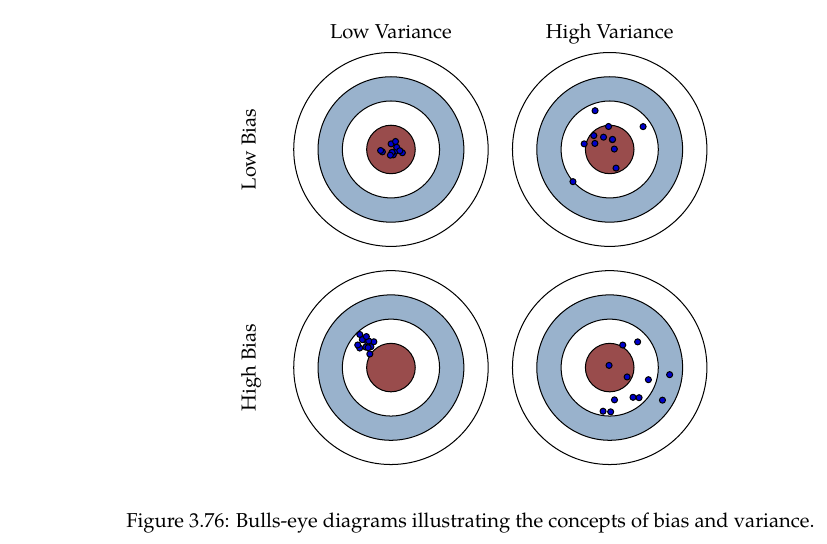

La grafica anterio explica la relacion entre Bias y Variance.

Otra grafica util que explica el problema es la siguiente.

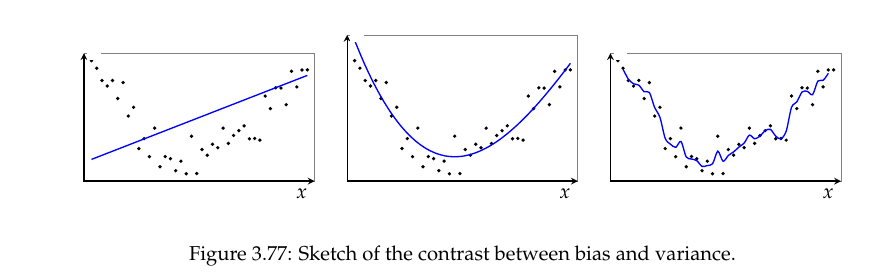


En la tercera existe sobreajuste y en la primera subajuste, en la medio ajuste.



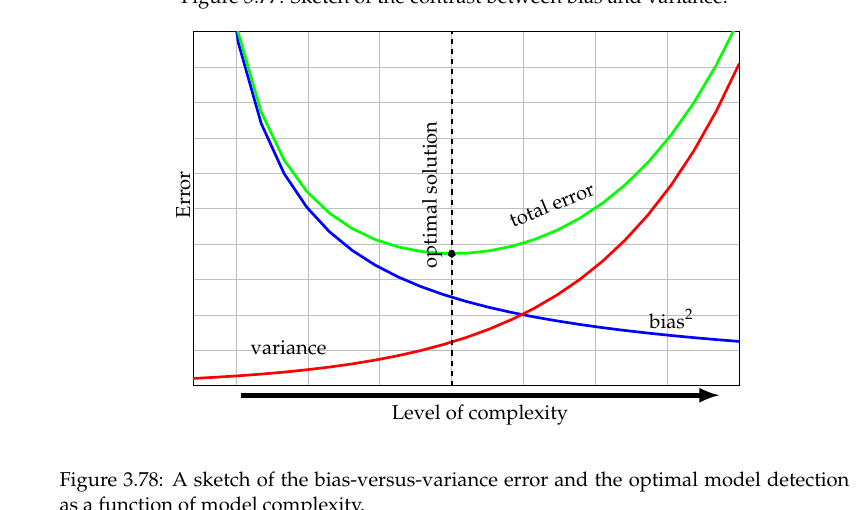